# Orders - Multivariate Regression of  the `review_score`

In [1]:
# Modules are imported 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

#orders dataset is imported
from order import Order

%load_ext autoreload
%autoreload 2

In [2]:
orders = Order().get_training_data()

From our simple_analysis: 

Based on our correlation matrix down below 👇, we can notice that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

Here, `statsmodels` will be used to distinguish the effect of one feature, **holding the other features constant**.

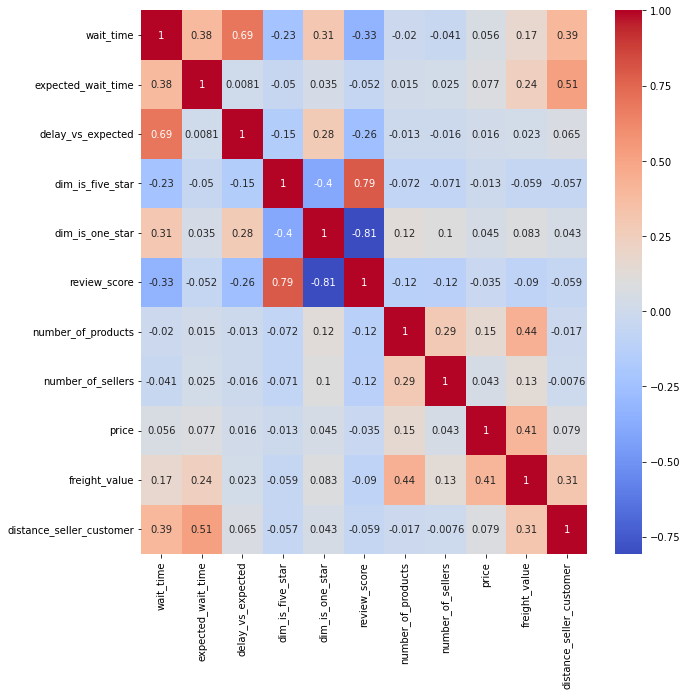

In [3]:
plt.figure(figsize = (10,10))

sns.heatmap(orders.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10});

## 1 - Univariate regression

❓ [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) is used with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, the `summary` table is printed and the results are interpreted:
- The way these results match those of the seaborn regplot is contemplated
- The regression performance metrics `R-squared`, as well as `individual regression coefficients`, `t-values`, `p-values`, and `95% confidence intervals` are read

Note:
OLS => Ordinary Least Squares

***Model 1***:

In [4]:
model1 = smf.ols(formula = "review_score ~ wait_time", data = orders)

model1 = model1.fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:58:19   Log-Likelihood:            -1.5442e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7020      0.006    742.206      0.000       4.690       4.714
wait_time     -0.0454      0.000   -109.678      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19550.021   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35437.440
Skew:                          -1.301   Prob(JB):                         0.00
Kurtosis:                       4.451   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [5]:
model2 = smf.ols(formula = "review_score ~ delay_vs_expected", data = orders)

model2 = model2.fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     7143.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:58:19   Log-Likelihood:            -1.5664e+05
No. Observations:               95872   AIC:                         3.133e+05
Df Residuals:                   95870   BIC:                         3.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2074      0.004   1038.659      0.000       4.199       4.215
delay_vs_expected    -0.0743      0.001    -84.514      0.000      -0.076      -0.073
==============================================================================
Omnibus:                    20613.560   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47608.881
Skew:                          -1.219   Prob(JB):                         0.00
Kurtosis:                       5.444   Cond. No.                         4.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, an OLS model `model3` is run, where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

***Model 3***:

In [6]:
model3 = smf.ols(formula = "review_score ~ wait_time + delay_vs_expected", data = orders)

model3 = model3.fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     6133.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:58:20   Log-Likelihood:            -1.5431e+05
No. Observations:               95872   AIC:                         3.086e+05
Df Residuals:                   95869   BIC:                         3.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6447      0.007    622.135      0.000       4.630       4.659
wait_time            -0.0396      0.001    -69.047      0.000      -0.041      -0.038
delay_vs_expected    -0.0172      0.001    -14.481      0.000      -0.020      -0.015
==============================================================================
Omnibus:                    19900.744   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39260.968
Skew:                          -1.259   Prob(JB):                         0.00
Kurtosis:                       4.868   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
👉 Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **`partial correlation coefficients`**. 

💡 Details 💡

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. 

✅ More features are added to our regression to improve the explainability of the linear regression.

👉 A new OLS `model4` is created with more features from the `orders` dataset.
- ⚠️ Features that are directly derived from the `review_score` are not added as they will create **data leaks**
- ⚠️ Two features perfectly colinear with each other are not added
- ⚖️  Each feature $X_i$ is transformed into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ will not be in the same dimension, meaning we will be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

📝 <u>Note</u>: a **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because in this model, we want to minimise the **`MSE Mean Squared Errors`**

***Model 4***:

❓ What features will we consider ?

⚖️ Features are standardized.

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others 
    
    *Ex: if there is a feature "number of bedrooms" from 1 to 5 and a feature "surface" from 20 to 200 sqm, the ranges of these two features are quite different...*

📅 If we are using Machine Learning Algorithms, some scaling operations will need to be performed before trying to predict any target.

In [7]:
orders["wait_time_scaled"] = (orders["wait_time"] - orders["wait_time"].mean())/orders["wait_time"].std()

orders["delay_vs_expected_scaled"] = (orders["delay_vs_expected"] - orders["delay_vs_expected"].mean())/orders["delay_vs_expected"].std()

orders["price_scaled"] = (orders["price"] - orders["price"].mean())/orders["price"].std()

orders["distance_seller_customer_scaled"] = (orders["distance_seller_customer"] - orders["distance_seller_customer"].mean())/orders["distance_seller_customer"].std()

orders["number_of_products_scaled"] = (orders["number_of_products"] - orders["number_of_products"].mean())/orders["number_of_products"].std()

orders["number_of_sellers_scaled"] = (orders["number_of_sellers"] - orders["number_of_sellers"].mean())/orders["number_of_sellers"].std()

orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer,wait_time_scaled,delay_vs_expected_scaled,price_scaled,distance_seller_customer_scaled,number_of_products_scaled,number_of_sellers_scaled
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837,-0.428002,-0.153335,-0.513802,-0.979475,-0.264595,-0.112544
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580,0.100519,-0.153335,-0.086640,0.429743,-0.264595,-0.112544
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333,-0.322297,-0.153335,0.111748,-0.145495,-0.264595,-0.112544
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366,0.100519,-0.153335,-0.441525,2.054621,-0.264595,-0.112544
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037,-1.062226,-0.153335,-0.562388,-0.959115,-0.264595,-0.112544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,0.0,delivered,1,0,5,1,1,72.00,13.08,69.481037,-0.428002,-0.153335,-0.311513,-0.893033,-0.264595,-0.112544
95876,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,0.0,delivered,0,0,4,1,1,174.90,20.10,474.098245,1.051855,-0.153335,0.183977,-0.212797,-0.264595,-0.112544
95877,83c1379a015df1e13d02aae0204711ab,24.0,30.0,0.0,delivered,1,0,5,1,1,205.99,65.02,968.051192,1.263263,-0.153335,0.333684,0.617630,-0.264595,-0.112544
95878,11c177c8e97725db2631073c19f07b62,17.0,37.0,0.0,delivered,0,0,2,2,1,359.98,81.18,370.146853,0.523335,-0.153335,1.075186,-0.387558,1.601605,-0.112544


👉 `model4` is created and trained.

In [8]:
model4 = smf.ols(formula = "review_score ~ wait_time_scaled + delay_vs_expected_scaled + price_scaled + distance_seller_customer_scaled + number_of_products_scaled + number_of_sellers_scaled", data = orders)

model4 = model4.fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2698.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:58:20   Log-Likelihood:            -1.5261e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95865   BIC:                         3.053e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           4.1555      0.004   1082.409      0.000       4.148       4.163
wait_time_scaled                   -0.4534      0.006    -74.213      0.000      -0.465      -0.441
delay_vs_expected_scaled           -0.0344      0.006     -6.117      0.000      -0.045      -0.023
price_scaled                       -0.0014      0.004     -0.368      0.713      -0.009       0.006
distance_seller_customer_scaled     0.1021      0.004     23.129      0.000       0.093       0.111
number_of_products_scaled          -0.1280      0.004    -31.546      0.000      -0.136      -0.120
number_of_sellers_scaled           -0.1317      0.004    -32.800      0.000      -0.140      -0.124
==============================================================================
Omnibus:                    18653.258   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36496.248
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                       4.874   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ What are the most important features? (A bar chart is made to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [9]:
model4.params

Intercept                          4.155509
wait_time_scaled                  -0.453362
delay_vs_expected_scaled          -0.034374
price_scaled                      -0.001435
distance_seller_customer_scaled    0.102053
number_of_products_scaled         -0.127955
number_of_sellers_scaled          -0.131657
dtype: float64

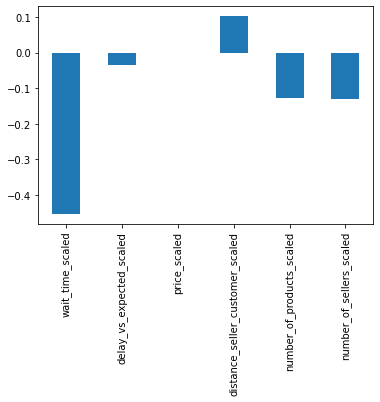

In [10]:
model4.params[1:].plot(kind = "bar");

<details>
    <summary>- 💡Details 💡 -</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
- Depending on the choice of feature, we may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of `review_score` lies outside of the orders dataset.

⚠️ Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

⚠️ Regression performance should not be measured only by its R-squared!  

👀 The distribution of the predictions are visualized, especially the residuals.

❓ The residuals are computed.

The mean of the residuals should be close to 0 (always verified in a linear regression context)

In [11]:
predicted_review_score = model4.predict(orders)

predicted_review_score

0        4.304272
1        4.207863
2        4.340563
3        4.374196
4        4.593953
           ...   
95875    4.312804
95876    3.710601
95877    3.699290
95878    3.692309
95879    4.457230
Length: 95872, dtype: float64

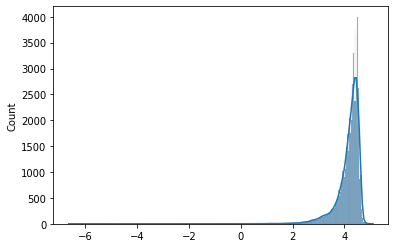

In [12]:
sns.histplot(predicted_review_score, kde = True);

In [13]:
residuals = predicted_review_score - orders["review_score"]
residuals.mean()

3.110062274469646e-14

🧮 The associated RMSE is computed. 

In [14]:
rmse = residuals.std()
rmse

1.1886810078115202

📊 The `residuals` are plotted in a histogram.

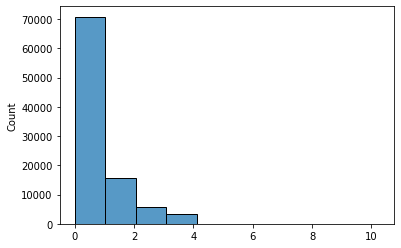

In [15]:
sns.histplot(abs(residuals), bins = 10);

❓ Why the residual distplot has such a strange shape? 

👉 On the same graph, both the distribution of the `review_score` and the distribution of the`predicted_review_score` are plotted.

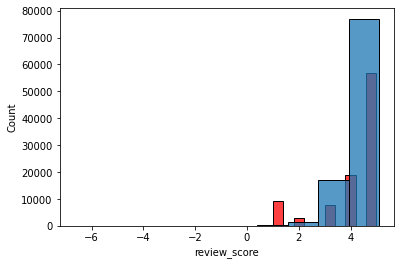

In [16]:
sns.histplot(orders["review_score"], color = "red", bins = 10)

sns.histplot(predicted_review_score, bins = 10);

📈 Using `seaborn`, a `regression line` of the `review_score` vs. the `delay_vs_expected` is plotted, once with a sub-`sample` of the population, and once with the `entire population`.

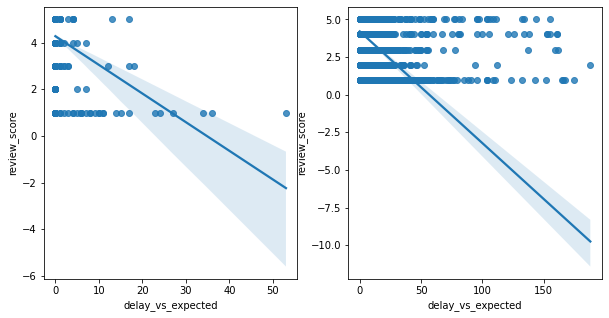

In [17]:
orders_subsample = orders.sample(1000, random_state = 42)

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.regplot(x = "delay_vs_expected", y = "review_score", data = orders_subsample)

plt.subplot(1,2,2)
sns.regplot(x = "delay_vs_expected", y = "review_score", data = orders);

☝️ It is hard to regress the `review_score` of an order vs. its `wait_time`. because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

📅 The `Logistic Regression` will be used next, which is a `Classification Algorithm`

☝️ This model is not so great, for two reasons:
- First, because there are have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

💡 So instead on working on individual orders and trying to explain their discrete `rewiew_score` based on the `wait_time`, we will focus our analysis on the sellers' level, aggregating the orders by sellers in the next challenge.